In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [3]:
data = pd.read_csv("price house.csv")
data.sample(6)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1095,1096,20,RL,78.0,9317,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,6,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,24,Unf,0,1290,1314,GasA,...,Y,SBrkr,1314,0,0,1314,0,0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,RFn,2,440,TA,TA,Y,0,22,0,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,176432
43,44,20,RL,NaN,9200,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1980,Hip,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,Av,LwQ,280,BLQ,491,167,938,GasA,...,Y,SBrkr,938,0,0,938,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1977.0,Unf,1,308,TA,TA,Y,145,0,0,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,130250
330,331,90,RL,NaN,10624,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,Duplex,1Story,5,4,1964,1964,Gable,CompShg,HdBoard,HdBoard,BrkFace,84.0,TA,TA,CBlock,TA,TA,No,GLQ,40,Rec,264,1424,1728,GasA,...,Y,SBrkr,1728,0,0,1728,0,1,2,0,6,2,TA,10,Typ,0,NaN,Detchd,2002.0,Unf,1,352,TA,TA,Y,155,0,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal,119000
816,817,20,RL,NaN,11425,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1954,1954,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,486,Unf,0,522,1008,GasA,...,Y,SBrkr,1008,0,0,1008,0,0,1,0,2,1,TA,4,Typ,1,Gd,Attchd,1954.0,RFn,1,275,TA,TA,Y,0,0,120,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,137000
1301,1302,70,RL,NaN,7500,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,6,7,1942,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,547,Unf,0,224,771,GasA,...,Y,SBrkr,753,741,0,1494,0,0,1,0,3,1,Gd,7,Typ,2,Gd,Attchd,1942.0,Unf,1,213,TA,TA,P,0,0,0,0,224,0,NaN,NaN,NaN,0,11,2009,WD,Normal,177500
1110,1111,60,RL,NaN,8000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1995,1996,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,219,Unf,0,554,773,GasA,...,Y,SBrkr,773,885,0,1658,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1995.0,Fin,2,431,TA,TA,Y,224,84,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,188000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

1. kolom id tidak berguna, dan karena banyak yang nilai kosong yang tersebar lebih baik dibuat dataframe agar jelas informasinya
2. labelnya adalah salesprice
3. dan sepertinya variable sudah sesuai tipe datanya

In [5]:
features_na = [features for features in data.columns if data[features].isnull().sum()>1]
for feature in features_na:
    print(feature, np.round(data[feature].isnull().mean(), 4))

LotFrontage 0.1774
Alley 0.9377
MasVnrType 0.0055
MasVnrArea 0.0055
BsmtQual 0.0253
BsmtCond 0.0253
BsmtExposure 0.026
BsmtFinType1 0.0253
BsmtFinType2 0.026
FireplaceQu 0.4726
GarageType 0.0555
GarageYrBlt 0.0555
GarageFinish 0.0555
GarageQual 0.0555
GarageCond 0.0555
PoolQC 0.9952
Fence 0.8075
MiscFeature 0.963


data yang perlu dibuang adalah variable PoolQC, MiscFeature, Fence, Alley, FireplaceQu karena lebih dari 30% data yang hilang, jika diisi dikhawatirkan menimbulkan data yang bias, dan data yang kosong pada variable selain itu akan diisi

In [6]:
#menghapus kolom yang banyak unique dan kosongnya 
data.drop(["Id","PoolQC","Fence","MiscFeature","Alley","FireplaceQu"], axis=1, inplace=True)

In [7]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [8]:
num = ['MSSubClass','LotFrontage', 'LotArea','OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
    'MasVnrArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch','ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    '1stFlrSF', '2ndFlrSF', 'LowQualFinSF','GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr','GarageCars', 'GarageArea','GarageYrBlt','Fireplaces','TotRmsAbvGrd','SalePrice']
cat = data[[col for col in data.columns if (str(data[col].dtype) == 'object') and col not in num]]

In [9]:
data[num].describe().style.background_gradient(axis=1,cmap=sns.light_palette('navy', as_cmap=True))

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,GarageCars,GarageArea,GarageYrBlt,Fireplaces,TotRmsAbvGrd,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,1.767123,472.980137,1978.506164,0.613014,6.517808,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,0.747315,213.804841,24.689725,0.644666,1.625393,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,2.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,334.500000,1961.000000,0.000000,5.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,2.000000,480.000000,1980.000000,1.000000,6.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,2.000000,576.000000,2002.000000,1.000000,7.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,4.000000,1418.000000,2010.000000,3.000000,14.000000,755000.000000


1. Kelas bangunan rata-rata adalah kelas 56, luas area tanah 10516 kaki, tahun renovasi bangunan rata-rata 1984, luas veneer batu rata-rata adalah 103 kaki, harga rumah rata-rata $180921.195890 dst 
2. jarak jalan ke properti rata-rata 70 kaki , rata-rata peringkat kondisi bangunan 5, tahun dibangun rata-rata 1971, dst
3. untuk missing value pada data yang berbentuk skew bisa diisi dengan nilai median, dan isi dengan mean ketika bentuknya mendekati gaussian, sedangkan bentuk data yang kategori diisi dengan modus nya

In [10]:
data.describe(include='object')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,870,605,1311,1326,1340,1267,1198


1. jenis akses jalan mayoritas pave, Bentuk umum properti reguler, Kerataan properti mayoritas lvl, dst
2. apabila jenis data object ada yang kosong bisa diisi dengan nilai mayoritas(mode)

In [11]:
for col in cat: #sebaran nilai
    print(f'''Value count kolom {col}:''')
    print(data[col].value_counts())
    print()

Value count kolom MSZoning:
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Value count kolom Street:
Pave    1454
Grvl       6
Name: Street, dtype: int64

Value count kolom LotShape:
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

Value count kolom LandContour:
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Value count kolom Utilities:
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

Value count kolom LotConfig:
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

Value count kolom LandSlope:
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Value count kolom Neighborhood:
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41


UNIVARIATE ANALYSIS : untuk melihat bagaimana karakteristik per variable

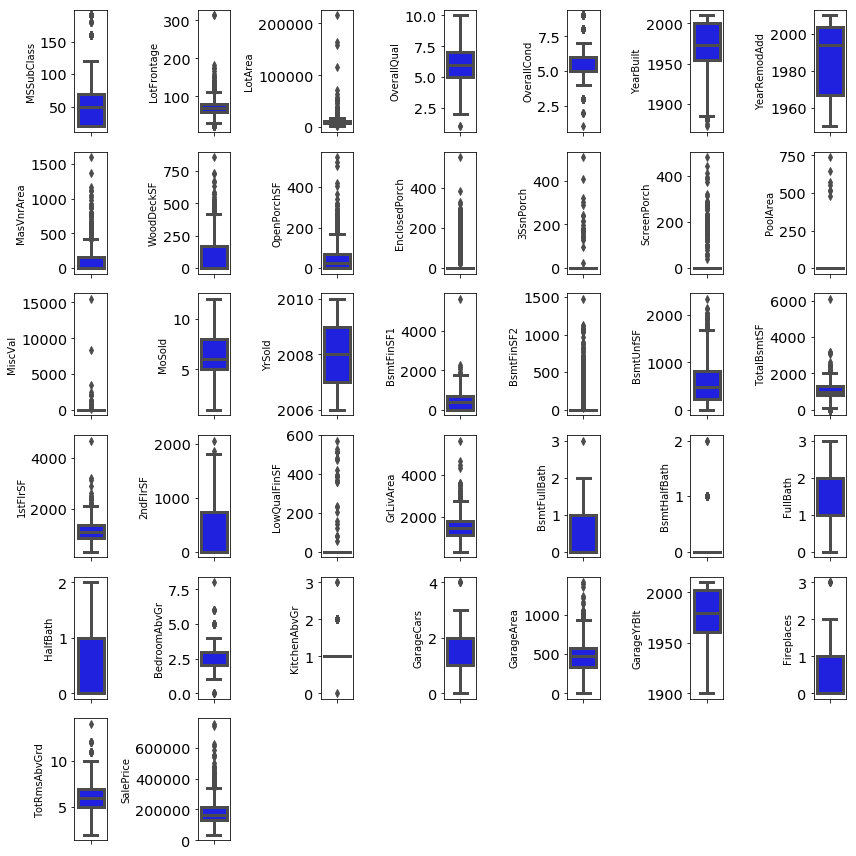

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, len(num)):
    plt.subplot(6, 7, i+1)
    sns.boxplot(data[num[i]], color='blue', orient='v')
    plt.tight_layout()
#terlihat per variable data banyak outliernya dan ukuran IQR beraneka ragam, maka lebih baik handle outlier dgn zscore

In [12]:
print("Skew: {}".format(data[num].skew()))
print("Kurtosis: {}".format(data[num].kurtosis()))

Skew: MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
GarageCars       -0.342549
GarageArea        0.179981
GarageYrBlt      -0.649415
Fireplaces        0.649565
TotRmsAbvGrd      0.676341
SalePrice         1.88

In [13]:
missing_data_object_column=[i for i in data.columns if data[i].isnull().sum()>0 and data[i].dtype=='O']
missing_data_numeric_column=[i for i in data.columns if data[i].isnull().sum()>0 and data[i].dtype!='O' and data[i].nunique()>20]
missing_categorical=[i for i in data.columns if data[i].isnull().sum()>0 and data[i].dtype!='O' and data[i].nunique()<20]
missing_categorical_data=missing_categorical+missing_data_object_column

In [14]:
def removing_missing_value(data): #menghapus missing value untuk numerikal dan kategorikal data sesuai dengan keadaan skew
    for col in missing_categorical_data:
        data[col].fillna(method='ffill',inplace=True)
    for cols in missing_data_numeric_column:
        data[cols].fillna(value=np.mean(data[cols]),inplace=True)
removing_missing_value(data)

In [15]:
data.info()#sudah bersih data melewati data cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [16]:
#buat regulasi mengeani skew
numeric_skew_data_name=[i for i in data.columns if data[i].dtype!='O' and data[i].skew()>2.5]

In [17]:
# handle skew data dengan normalisasi
def remove_skewness(data):
    for cols in numeric_skew_data_name:
        data[cols]=data[cols].apply(lambda x: np.log(x+1))
    return data
data1=remove_skewness(data)

In [18]:
data1.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,60,RL,62.0,8.976894,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0.000000,953,953,GasA,Ex,Y,SBrkr,953,694,0.0,1647,0,0.0,2,1,3,0.693147,TA,7,Typ,1,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0.000000,0.0,0.0,0.0,0.000000,8,2007,WD,Normal,175000
1456,20,RL,85.0,9.486152,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,4.787492,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,5.099866,589,1542,GasA,TA,Y,SBrkr,2073,0,0.0,2073,1,0.0,2,0,3,0.693147,TA,7,Min1,2,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0.000000,0.0,0.0,0.0,0.000000,2,2010,WD,Normal,210000
1457,70,RL,66.0,9.109746,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.000000,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0.000000,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0.0,2340,0,0.0,2,0,4,0.693147,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0.000000,0.0,0.0,0.0,7.824446,5,2010,WD,Normal,266500
1458,20,RL,68.0,9.181735,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,6.937314,0,1078,GasA,Gd,Y,FuseA,1078,0,0.0,1078,1,0.0,1,0,2,0.693147,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,4.727388,0.0,0.0,0.0,0.000000,4,2010,WD,Normal,142125
1459,20,RL,75.0,9.204121,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.000000,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,5.673323,136,1256,GasA,Gd,Y,SBrkr,1256,0,0.0,1256,1,0.0,1,1,3,0.693147,TA,6,Typ,0,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0.000000,0.0,0.0,0.0,0.000000,6,2008,WD,Normal,147500


In [19]:
#handle dulicated data
print(data1.duplicated().sum())
data1.drop_duplicates(inplace=True)
print(data1.duplicated().sum())

0
0


In [20]:
data1['log_Price']=np.log10(data1['SalePrice'])

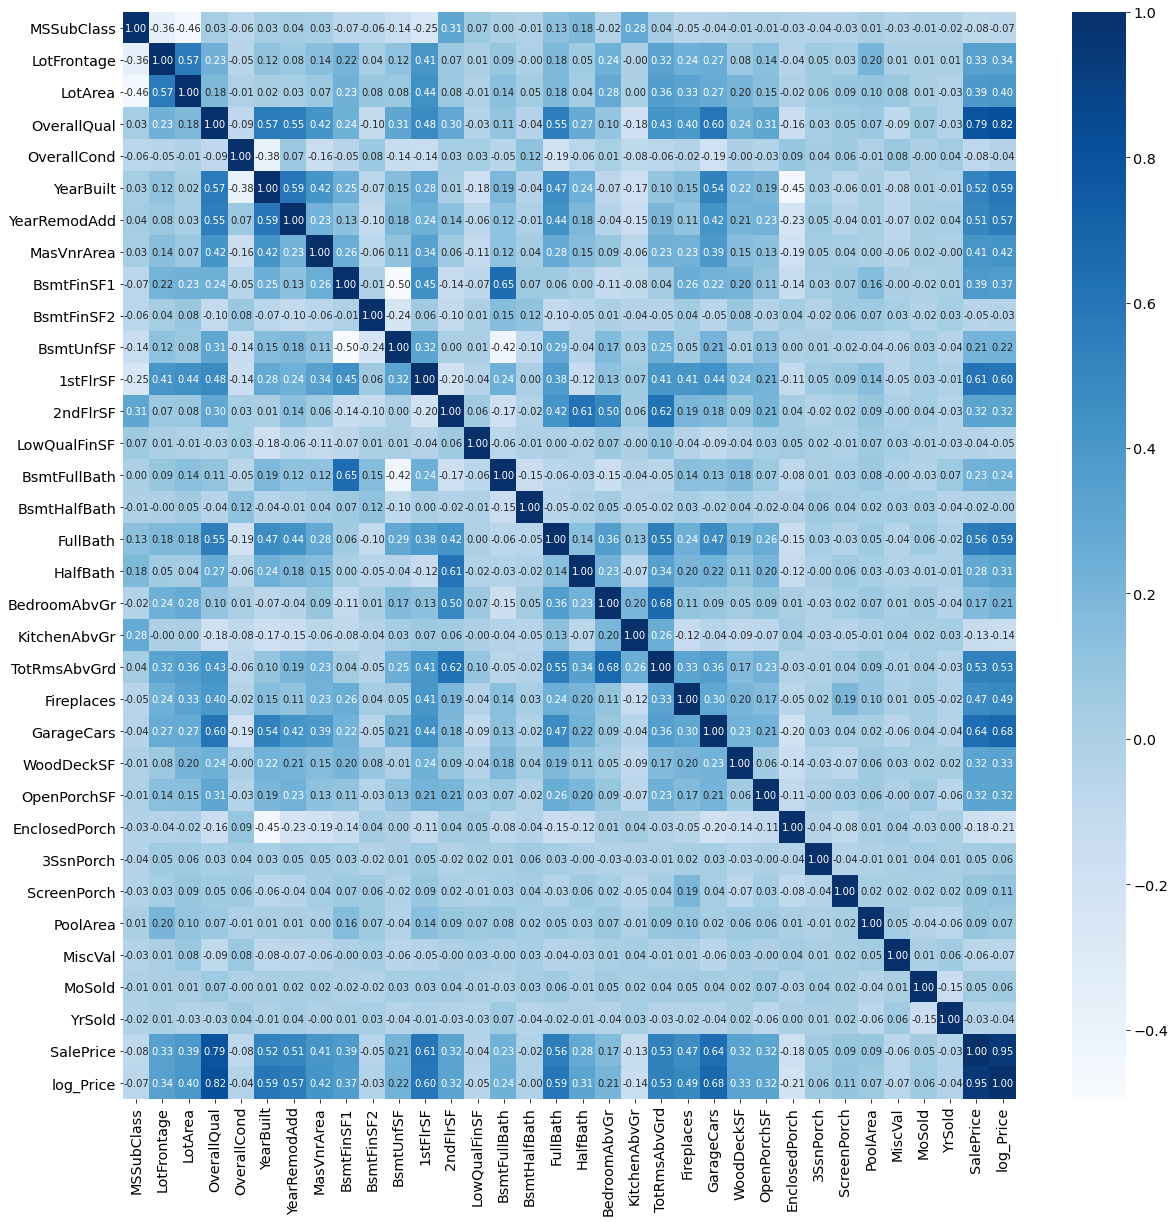

In [49]:
plt.figure(figsize=(20, 20))
sns.heatmap(data1.corr(), cmap='Blues', annot=True, fmt='.2f')

In [21]:
data1.drop(["GarageArea","GrLivArea","TotalBsmtSF","GarageYrBlt"], axis=1, inplace=True)

In [22]:
data2 = pd.get_dummies(data1)
data2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,log_Price,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,...,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,9.042040,7,5,2003,2003,5.283204,706,0.0,150,856,854,0.0,1,0.000000,2,1,3,0.693147,8,0,2,0,61,0.000000,0.0,0.0,0.0,0.0,2,2008,208500,5.319106,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9.169623,6,8,1976,1976,0.000000,978,0.0,284,1262,0,0.0,0,0.693147,2,0,3,0.693147,6,1,2,298,0,0.000000,0.0,0.0,0.0,0.0,5,2007,181500,5.258877,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,60,68.0,9.328212,7,5,2001,2002,5.093750,486,0.0,434,920,866,0.0,1,0.000000,2,1,3,0.693147,6,1,2,0,42,0.000000,0.0,0.0,0.0,0.0,9,2008,223500,5.349278,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9.164401,7,5,1915,1970,0.000000,216,0.0,540,961,756,0.0,1,0.000000,1,0,3,0.693147,7,1,3,0,35,5.609472,0.0,0.0,0.0,0.0,2,2006,140000,5.146128,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,60,84.0,9.565284,8,5,2000,2000,5.860786,655,0.0,490,1145,1053,0.0,1,0.000000,2,1,4,0.693147,9,1,3,192,84,0.000000,0.0,0.0,0.0,0.0,12,2008,250000,5.397940,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [23]:
from scipy import stats
print(f'Jumlah baris sebelum memfilter outlier: {len(data2)}')
## CODE HERE
filtered_entries = np.array([False] * len(data2))
for col in ['MSSubClass','LotFrontage','LotArea','YearBuilt','MasVnrArea','WoodDeckSF', 'OpenPorchSF',
            'BsmtUnfSF','1stFlrSF', '2ndFlrSF', 'BsmtFullBath','GarageCars',
           'TotRmsAbvGrd','SalePrice']:
    zscore = abs(stats.zscore(data2[col]))
    print(np.max(zscore))
    filtered_entries = (zscore > 3) | filtered_entries
    
data3 = data2[~filtered_entries]
print(f'Jumlah baris setelah memfilter outlier: {len(data3)}')

Jumlah baris sebelum memfilter outlier: 1460
3.147672552810648
11.034918093815902
6.126490223054396
3.287823627081604
1.9898032849333038
6.087634999939538
7.554198174442678
4.004295000518199
9.132681280322796
3.9369627591698944
4.963359178355918
2.988889235402396
4.604888881772236
7.228819418471526
Jumlah baris setelah memfilter outlier: 1293


In [35]:
#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split
X = data3.drop(['SalePrice','log_Price'], axis=1)
y = data3['log_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [36]:
#Fitting simple randomforest to the Training Set
from  sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
#Predicting the log confirmed
pred = regressor.predict(X_test)
regressor.score(X_test, y_test)#liat skor data test

0.8811146383624852

In [37]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
print('tabel error randomforest : ')
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('R Squared Error          : ', metrics.r2_score(y_test, pred))
# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('Variance score           :  %.2f' % r2_score(y_test, pred))

tabel error randomforest : 
Mean Absolute Error      :  0.038507068578725864
Mean Squared  Error      :  0.0030252013427865205
Root Mean Squared  Error :  0.055001830358511895
R Squared Error          :  0.8811146383624852
Variance score           :  0.88


In [38]:
from sklearn.linear_model import LinearRegression 
regressor1 = LinearRegression()
regressor1.fit(X_train, y_train)
pred1 = regressor1.predict(X_test)
regressor1.score(X_test, y_test)#skor untuk linear regresi

0.9106717296893242

In [48]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
print('tabel error linear regression : ')
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, pred1))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, pred1))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, pred1)))
print('R Squared Error          : ', metrics.r2_score(y_test, pred1))
# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('Variance score           :  %.2f' % r2_score(y_test, pred1))

tabel error linear regression : 
Mean Absolute Error      :  0.03311207487090139
Mean Squared  Error      :  0.0022730805506283617
Root Mean Squared  Error :  0.04767683452818949
R Squared Error          :  0.9106717296893241
Variance score           :  0.91


In [40]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train, y_train)
lasso_y_preds = lasso.predict(X_test)
lasso_score = lasso.score(X_test, y_test)
lasso_score

0.6774796019976512

In [41]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_y_preds = ridge.predict(X_test)
ridge_score = ridge.score(X_test, y_test)
ridge_score #model terbaik untuk data price house

0.9179363946502168

In [49]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix
print('tabel error linear regression (ridge) : ')
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, ridge_y_preds))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, ridge_y_preds))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, ridge_y_preds)))
print('R Squared Error          : ', metrics.r2_score(y_test, ridge_y_preds))
# Explained variance score: 1 is perfect prediction
from sklearn.metrics import r2_score
print('Variance score           :  %.2f' % r2_score(y_test, ridge_y_preds))

tabel error linear regression (ridge) : 
Mean Absolute Error      :  0.032090129484412915
Mean Squared  Error      :  0.0020882211710388397
Root Mean Squared  Error :  0.045697058669446546
R Squared Error          :  0.9179363946502168
Variance score           :  0.92


In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
rf_grid = {
    'n_estimators' : np.arange(10,200,10),
    'max_depth' : np.arange(1,12,2),
    'min_samples_leaf': np.arange(1,12,2),
    'min_samples_split' : np.arange(2,20, 2),
    'max_features' : [0.5, 1, 'sqrt', 'auto'],
}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   37.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [43]:
rs_model.best_params_

{'max_depth': 11,
 'max_features': 0.5,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 130}

In [47]:
rs_model.score(X_test, y_test)

0.8886798518809509